In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [44]:
df = pd.read_json("car_data.json")
df.head()

,model,body type,price,km,hp,Type,year,Body Color,Nr. of Doors,Nr. of Seats,Gearing Type,Cylinders,Drive chain,Fuel,Gears,Consumption,Upholstery
0,Opel Corsa,Sedans,11390,10.0,51,Pre-registered,2019.0,Blue,5,5,Manual,4,front,Gasoline,5,5.6,Cloth
1,Opel Corsa,Sedans,10765,10.0,55,New,2019.0,Blue,5,5,Manual,4,front,Gasoline,5,5.4,Cloth
2,Opel Astra,Other,8740,36600.0,77,Used,2016.0,Grey,5,5,Manual,3,front,Gasoline,5,4.6,Cloth
3,Opel Astra,Sedans,14999,22800.0,77,Used,2018.0,Brown,5,5,Manual,4,front,Gasoline,6,4.5,Cloth
4,Opel Astra,Station wagon,23200,750.0,110,Demonstration,2019.0,Black,5,5,Automatic,4,front,Gasoline,6,4.0,Cloth


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 899 entries, 0 to 898
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         899 non-null    object 
 1   body type     899 non-null    object 
 2   price         899 non-null    int64  
 3   km            897 non-null    float64
 4   hp            899 non-null    int64  
 5   Type          899 non-null    object 
 6   year          895 non-null    float64
 7   Body Color    896 non-null    object 
 8   Nr. of Doors  899 non-null    int64  
 9   Nr. of Seats  899 non-null    int64  
 10  Gearing Type  899 non-null    object 
 11  Cylinders     899 non-null    int64  
 12  Drive chain   899 non-null    object 
 13  Fuel          899 non-null    object 
 14  Gears         899 non-null    int64  
 15  Consumption   894 non-null    float64
 16  Upholstery    899 non-null    object 
dtypes: float64(3), int64(6), object(8)
memory usage: 126.4+ KB


In [46]:
df.shape

(899, 17)

In [47]:
df.isnull().sum()

model           0
body type       0
price           0
km              2
hp              0
Type            0
year            4
Body Color      3
Nr. of Doors    0
Nr. of Seats    0
Gearing Type    0
Cylinders       0
Drive chain     0
Fuel            0
Gears           0
Consumption     5
Upholstery      0
dtype: int64

<AxesSubplot:>

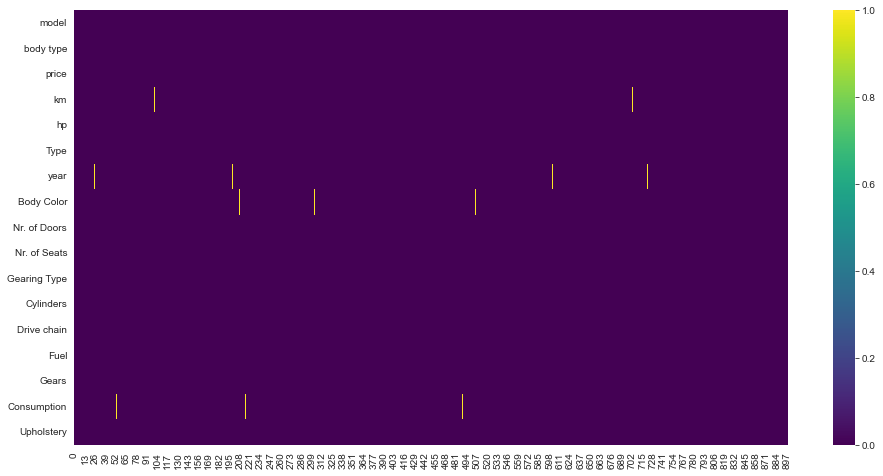

In [50]:
plt.figure(figsize=(16,8))
sns.heatmap(df.isnull().T,  cmap = 'viridis')

In [51]:
df.describe()

,price,km,hp,year,Nr. of Doors,Nr. of Seats,Cylinders,Gears,Consumption
count,899.000000,897.000000,899.000000,895.000000,899.000000,899.000000,899.000000,899.000000,894.000000
mean,18557.033370,30277.092797,88.829811,2017.629050,4.850945,4.976641,3.800890,5.963293,4.863758
std,7542.677665,35031.036125,25.981297,1.125684,0.525546,0.420136,0.402331,0.698223,0.897318
min,6490.000000,0.000000,1.000000,2016.000000,3.000000,2.000000,3.000000,5.000000,3.000000
25%,13280.000000,1500.000000,66.500000,2017.000000,5.000000,5.000000,4.000000,6.000000,4.200000
50%,17475.000000,19550.000000,85.000000,2018.000000,5.000000,5.000000,4.000000,6.000000,4.750000
75%,22400.000000,42813.000000,106.500000,2019.000000,5.000000,5.000000,4.000000,6.000000,5.500000
max,49490.000000,215968.000000,294.000000,2019.000000,5.000000,7.000000,5.000000,8.000000,10.000000


In [52]:
df.columns

Index(['model', 'body type', 'price', 'km', 'hp', 'Type', 'year', 'Body Color',
       'Nr. of Doors', 'Nr. of Seats', 'Gearing Type', 'Cylinders',
       'Drive chain', 'Fuel', 'Gears', 'Consumption', 'Upholstery'],
      dtype='object')

In [53]:
df["model"].describe()

count         899
unique          8
top       Audi A3
freq          174
Name: model, dtype: object

In [54]:
df["model"].unique()

array(['Opel Corsa', 'Opel Astra', 'Audi A1', 'Renault Clio',
       'Opel Insignia', 'Audi A3', 'Renault Espace', 'Renault Duster'],
      dtype=object)

In [55]:
df["model"].nunique()

8

In [56]:
df["model"].value_counts(dropna=False)

Audi A3           174
Audi A1           153
Opel Insignia     151
Opel Astra        140
Opel Corsa        134
Renault Clio       84
Renault Espace     60
Renault Duster      3
Name: model, dtype: int64

In [57]:
df[['model', 'body type', 'Type', 'Body Color', 'Gearing Type', 'Drive chain', 'Fuel', 'Upholstery']].describe()

,model,body type,Type,Body Color,Gearing Type,Drive chain,Fuel,Upholstery
count,899,899,899,896,899,899,899,899
unique,8,9,5,10,3,2,3,6
top,Audi A3,Sedans,Used,Grey,Manual,front,Gasoline,Cloth
freq,174,433,627,228,443,884,478,703


In [58]:
df[df["Body Color"].isnull()]

,model,body type,price,km,hp,Type,year,Body Color,Nr. of Doors,Nr. of Seats,Gearing Type,Cylinders,Drive chain,Fuel,Gears,Consumption,Upholstery
208,Audi A1,Sedans,15880,24725.0,66,Used,2018.0,None,5,4,Manual,3,front,Diesel,5,3.9,Cloth
302,Audi A1,Sedans,23440,10500.0,70,Used,2018.0,None,5,5,Automatic,3,front,Gasoline,7,4.5,Cloth
505,Audi A3,Compact,16900,105231.0,81,Used,2016.0,None,5,5,Automatic,4,front,Diesel,7,3.9,Cloth


In [59]:
df[df["model"]=="Audi A1"]["Body Color"].value_counts(dropna=False)

White     38
Black     29
Grey      27
Blue      23
Red       17
Silver     9
Beige      3
Yellow     3
Brown      2
NaN        2
Name: Body Color, dtype: int64

In [60]:
df[df["model"]=="Audi A1"]["Body Color"].value_counts(dropna=False).idxmax()

'White'

In [61]:
df.loc[df[(df["Body Color"].isnull()) & (df["model"]=="Audi A1")].index, "Body Color"] = df[df["model"]=="Audi A1"]["Body Color"].value_counts(dropna=False).idxmax()

In [62]:
df["Body Color"].isnull().sum()

1

In [63]:
df[(df["model"] == "Audi A3")]["Body Color"].value_counts(dropna=False)

Black     49
White     45
Grey      44
Silver    19
Blue       8
Red        6
Brown      2
NaN        1
Name: Body Color, dtype: int64

In [66]:
df["Body Color"].fillna("Black", inplace=True)
#df["Body Color"].fillna(df[df["model"]=="Audi A3"]["Body Color"].value_counts(dropna=False).idxmax(), inplace=True)
#
#df.loc[df[(df["Body Color"].isnull()) & (df["model"]=="Audi A3")].index, "Body Color"] = df[df["model"]=="Audi A3"]["Body Color"].value_counts(dropna=False).idxmax()

In [68]:
df["Body Color"].isnull().sum()

0

In [69]:
df.isnull().sum()

model           0
body type       0
price           0
km              2
hp              0
Type            0
year            4
Body Color      0
Nr. of Doors    0
Nr. of Seats    0
Gearing Type    0
Cylinders       0
Drive chain     0
Fuel            0
Gears           0
Consumption     5
Upholstery      0
dtype: int64

In [70]:
df[df["year"].isnull()]

,model,body type,price,km,hp,Type,year,Body Color,Nr. of Doors,Nr. of Seats,Gearing Type,Cylinders,Drive chain,Fuel,Gears,Consumption,Upholstery
25,Audi A1,Sedans,15834,26289.0,66,Used,NaN,Blue,5,5,Manual,3,front,Diesel,5,3.9,Cloth
199,Opel Insignia,Station wagon,12480,112218.0,100,Used,NaN,Silver,5,5,Manual,4,front,Diesel,6,3.9,Cloth
602,Audi A3,Sedans,19000,27049.0,110,Used,NaN,Red,5,5,Automatic,4,front,Diesel,6,4.7,Cloth
721,Audi A1,Compact,26130,3050.0,85,Demonstration,NaN,Red,5,5,Automatic,3,front,Gasoline,7,4.9,Cloth


In [196]:
df.groupby(["model", "Type"])["year"].describe()

count         mean       std     min      25%  \
model          Type                                                            
Audi A1        Demonstration     5.0  2018.800000  0.447214  2018.0  2019.00   
               Employee's        6.0  2018.333333  0.516398  2018.0  2018.00   
               New              21.0  2019.000000  0.000000  2019.0  2019.00   
               Pre-registered   10.0  2019.000000  0.000000  2019.0  2019.00   
               Used            109.0  2017.339450  1.002037  2016.0  2016.00   
Audi A3        Demonstration     1.0  2018.000000       NaN  2018.0  2018.00   
               Employee's        7.0  2017.714286  0.755929  2017.0  2017.00   
               New              19.0  2019.000000  0.000000  2019.0  2019.00   
               Pre-registered   17.0  2019.000000  0.000000  2019.0  2019.00   
               Used            129.0  2017.147287  0.960963  2016.0  2016.00   
Opel Astra     Demonstration    13.0  2018.923077  0.277350  2018.0  2019.00   
               Employee's       12.0  2018.083333  0.288675  2018.0  2018.00   
               New              11.0  2019.000000  0.000000  2019.0  2019.00   
               Pre-registered    9.0  2019.000000  0.000000  2019.0  2019.00   
               Used             95.0  2017.094737  0.990097  2016.0  2016.00   
Opel Corsa     Demonstration     6.0  2019.000000  0.000000  2019.0  2019.00   
               Employee's       12.0  2018.166667  0.577350  2017.0  2018.00   
               New               9.0  2019.000000  0.000000  2019.0  2019.00   
               Pre-registered   21.0  2018.952381  0.218218  2018.0  2019.00   
               Used             86.0  2017.279070  0.928644  2016.0  2016.25   
Opel Insignia  Demonstration    11.0  2018.636364  0.809040  2017.0  2019.00   
               Employee's       14.0  2017.928571  0.267261  2017.0  2018.00   
               New              24.0  2019.000000  0.000000  2019.0  2019.00   
               Pre-registered    2.0  2019.000000  0.000000  2019.0  2019.00   
               Used             99.0  2016.979798  0.891911  2016.0  2016.00   
Renault Clio   Demonstration     3.0  2019.000000  0.000000  2019.0  2019.00   
               Employee's        4.0  2018.000000  0.000000  2018.0  2018.00   
               New               5.0  2019.000000  0.000000  2019.0  2019.00   
               Pre-registered   11.0  2018.727273  0.467099  2018.0  2018.50   
               Used             61.0  2017.049180  0.973417  2016.0  2016.00   
Renault Duster New               2.0  2019.000000  0.000000  2019.0  2019.00   
               Used              1.0  2019.000000       NaN  2019.0  2019.00   
Renault Espace Demonstration     2.0  2019.000000  0.000000  2019.0  2019.00   
               Employee's        1.0  2019.000000       NaN  2019.0  2019.00   
               New               3.0  2019.000000  0.000000  2019.0  2019.00   
               Pre-registered   10.0  2018.500000  0.527046  2018.0  2018.00   
               Used             44.0  2016.954545  0.987234  2016.0  2016.00   

                                  50%      75%     max  
model          Type                                     
Audi A1        Demonstration   2019.0  2019.00  2019.0  
               Employee's      2018.0  2018.75  2019.0  
               New             2019.0  2019.00  2019.0  
               Pre-registered  2019.0  2019.00  2019.0  
               Used            2017.0  2018.00  2019.0  
Audi A3        Demonstration   2018.0  2018.00  2018.0  
               Employee's      2018.0  2018.00  2019.0  
               New             2019.0  2019.00  2019.0  
               Pre-registered  2019.0  2019.00  2019.0  
               Used            2017.0  2018.00  2019.0  
Opel Astra     Demonstration   2019.0  2019.00  2019.0  
               Employee's      2018.0  2018.00  2019.0  
               New             2019.0  2019.00  2019.0  
               Pre-registered  2019.0  2019.00  2019.0 

<AxesSubplot:ylabel='Frequency'>

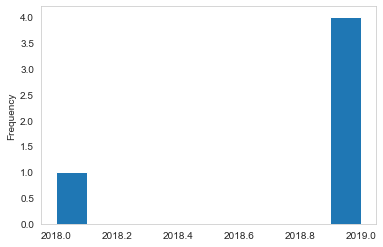

In [73]:
df[(df["model"]=="Audi A1") & (df["Type"]=="Demonstration")]["year"].plot(kind="hist")

In [74]:
df.drop(index=df[df["year"].isnull()].index, inplace=True)

In [75]:
df.isnull().sum()

model           0
body type       0
price           0
km              2
hp              0
Type            0
year            0
Body Color      0
Nr. of Doors    0
Nr. of Seats    0
Gearing Type    0
Cylinders       0
Drive chain     0
Fuel            0
Gears           0
Consumption     5
Upholstery      0
dtype: int64

In [76]:
df.shape

(895, 17)

In [77]:
df

,model,body type,price,km,hp,Type,year,Body Color,Nr. of Doors,Nr. of Seats,Gearing Type,Cylinders,Drive chain,Fuel,Gears,Consumption,Upholstery
0,Opel Corsa,Sedans,11390,10.0,51,Pre-registered,2019.0,Blue,5,5,Manual,4,front,Gasoline,5,5.6,Cloth
1,Opel Corsa,Sedans,10765,10.0,55,New,2019.0,Blue,5,5,Manual,4,front,Gasoline,5,5.4,Cloth
2,Opel Astra,Other,8740,36600.0,77,Used,2016.0,Grey,5,5,Manual,3,front,Gasoline,5,4.6,Cloth
3,Opel Astra,Sedans,14999,22800.0,77,Used,2018.0,Brown,5,5,Manual,4,front,Gasoline,6,4.5,Cloth
4,Opel Astra,Station wagon,23200,750.0,110,Demonstration,2019.0,Black,5,5,Automatic,4,front,Gasoline,6,4.0,Cloth
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894,Opel Insignia,Station wagon,17990,133100.0,125,Used,2016.0,Silver,5,5,Automatic,4,front,Diesel,6,5.7,Full leather
895,Audi A3,Sedans,19500,60000.0,81,Used,2017.0,White,5,5,Automatic,4,front,Diesel,6,4.7,Cloth
896,Audi A3,Sedans,12999,186000.0,110,Used,2016.0,White,5,5,Automatic,4,front,Diesel,6,4.4,Full leather
897,Audi A1,Sedans,16200,15577.0,70,Used,2018.0,Blue,5,5,Manual,3,front,Gasoline,5,4.3,Cloth


In [78]:
df.loc[721]

KeyError: 721

In [81]:
df.reset_index()

,index,model,body type,price,km,hp,Type,year,Body Color,Nr. of Doors,Nr. of Seats,Gearing Type,Cylinders,Drive chain,Fuel,Gears,Consumption,Upholstery
0,0,Opel Corsa,Sedans,11390,10.0,51,Pre-registered,2019.0,Blue,5,5,Manual,4,front,Gasoline,5,5.6,Cloth
1,1,Opel Corsa,Sedans,10765,10.0,55,New,2019.0,Blue,5,5,Manual,4,front,Gasoline,5,5.4,Cloth
2,2,Opel Astra,Other,8740,36600.0,77,Used,2016.0,Grey,5,5,Manual,3,front,Gasoline,5,4.6,Cloth
3,3,Opel Astra,Sedans,14999,22800.0,77,Used,2018.0,Brown,5,5,Manual,4,front,Gasoline,6,4.5,Cloth
4,4,Opel Astra,Station wagon,23200,750.0,110,Demonstration,2019.0,Black,5,5,Automatic,4,front,Gasoline,6,4.0,Cloth
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
890,894,Opel Insignia,Station wagon,17990,133100.0,125,Used,2016.0,Silver,5,5,Automatic,4,front,Diesel,6,5.7,Full leather
891,895,Audi A3,Sedans,19500,60000.0,81,Used,2017.0,White,5,5,Automatic,4,front,Diesel,6,4.7,Cloth
892,896,Audi A3,Sedans,12999,186000.0,110,Used,2016.0,White,5,5,Automatic,4,front,Diesel,6,4.4,Full leather
893,897,Audi A1,Sedans,16200,15577.0,70,Used,2018.0,Blue,5,5,Manual,3,front,Gasoline,5,4.3,Cloth


In [82]:
df = df.reset_index(drop=True)

In [83]:
df.loc[721]

model             Audi A3
body type          Sedans
price               18000
km                68025.0
hp                     81
Type                 Used
year               2016.0
Body Color           Grey
Nr. of Doors            5
Nr. of Seats            5
Gearing Type    Automatic
Cylinders               4
Drive chain         front
Fuel               Diesel
Gears                   6
Consumption           3.8
Upholstery          Cloth
Name: 721, dtype: object

In [84]:
df.isnull().sum()

model           0
body type       0
price           0
km              2
hp              0
Type            0
year            0
Body Color      0
Nr. of Doors    0
Nr. of Seats    0
Gearing Type    0
Cylinders       0
Drive chain     0
Fuel            0
Gears           0
Consumption     5
Upholstery      0
dtype: int64

In [85]:
df[df["km"].isnull()]

,model,body type,price,km,hp,Type,year,Body Color,Nr. of Doors,Nr. of Seats,Gearing Type,Cylinders,Drive chain,Fuel,Gears,Consumption,Upholstery
100,Opel Insignia,Sedans,23561,NaN,100,New,2019.0,Grey,5,5,Manual,4,front,Diesel,6,4.0,Cloth
699,Audi A1,Sedans,23900,NaN,85,Pre-registered,2019.0,Blue,5,4,Automatic,3,front,Gasoline,7,4.8,Cloth


In [86]:
df.groupby("model")["km"].describe()

,count,mean,std,min,25%,50%,75%,max
model,,,,,,,,
Audi A1,150.0,18904.673333,22279.766081,0.0,1141.00,11266.0,27572.25,129550.0
Audi A3,173.0,35722.635838,38675.953558,0.0,250.00,22462.0,55000.00,186000.0
Opel Astra,140.0,34521.607143,36429.637262,0.0,3291.00,25135.5,51795.50,160000.0
Opel Corsa,134.0,21642.111940,27704.157080,0.0,100.00,12961.0,30828.00,144260.0
Opel Insignia,149.0,39436.154362,42706.438892,0.0,7500.00,25249.0,57866.00,215968.0
Renault Clio,84.0,28819.395705,30535.232058,0.0,150.00,18950.0,44426.25,113392.0
Renault Duster,3.0,33.666667,58.312377,0.0,0.00,0.0,50.50,101.0
Renault Espace,60.0,32404.066667,35467.087394,0.0,1154.25,15781.5,55769.50,112500.0


<AxesSubplot:ylabel='Frequency'>

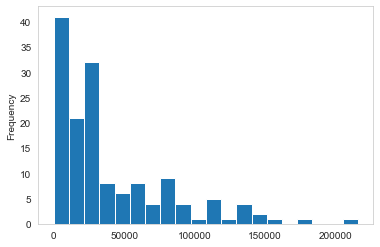

In [87]:
df[df["model"]=="Opel Insignia"]["km"].plot(kind="hist", bins=20)

<AxesSubplot:xlabel='km', ylabel='Density'>

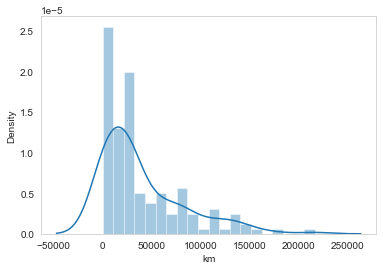

In [88]:
sns.distplot(df[df["model"]=="Opel Insignia"]["km"], bins=20)

<AxesSubplot:xlabel='km', ylabel='Density'>

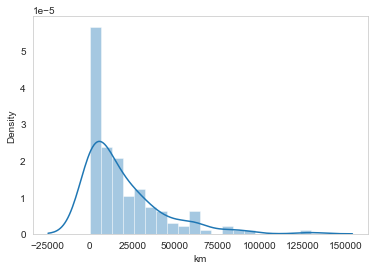

In [89]:
sns.distplot(df[df["model"]=="Audi A1"]["km"], bins=20)
#df[df["model"]=="Audi A1"]["km"].plot(kind="hist", bins=20)

In [90]:
df.groupby(["model", "year"])["km"].describe()

count          mean           std      min       25%  \
model          year                                                           
Audi A1        2016.0   29.0  49195.206897  26044.569721  14350.0  32779.00   
               2017.0   27.0  25659.777778  17206.457601   4339.0  13260.50   
               2018.0   45.0  14625.822222   8262.865055   1050.0   7701.00   
               2019.0   49.0   1184.979592   2130.360753      0.0      0.00   
Audi A3        2016.0   41.0  74492.780488  35114.476398     35.0  48000.00   
               2017.0   41.0  54539.707317  37180.210907   4500.0  26278.00   
               2018.0   44.0  19234.636364  12931.140686      1.0  12368.75   
               2019.0   47.0    922.553191   3129.326034      0.0      1.00   
Opel Astra     2016.0   36.0  77952.305556  38179.052721  16010.0  50981.75   
               2017.0   20.0  45798.900000  22578.693072   4200.0  27638.25   
               2018.0   45.0  23489.533333  10403.648760   1000.0  20100.00   
               2019.0   39.0   1377.820513   2498.186225      0.0      2.00   
Opel Corsa     2016.0   22.0  57904.590909  37876.602769   3600.0  34825.00   
               2017.0   25.0  35644.240000  22226.402602   5600.0  19463.00   
               2018.0   43.0  16608.953488  11355.556030     10.0   9512.00   
               2019.0   44.0    473.886364   1016.907629      0.0     10.00   
Opel Insignia  2016.0   38.0  93037.447368  43992.165358  12100.0  63976.50   
               2017.0   30.0  43702.400000  25850.022287   7164.0  24605.50   
               2018.0   45.0  22179.200000   6886.881890   5750.0  18174.00   
               2019.0   36.0    873.000000   2362.541731      0.0      0.00   
Renault Clio   2016.0   22.0  60931.454545  26994.399048   4500.0  41001.00   
               2017.0   19.0  34392.000000  18785.593017   7770.0  19500.00   
               2018.0   22.0  19061.590909  25196.021891      7.0   6473.50   
               2019.0   21.0    358.773295   1044.725430      0.0     10.00   
Renault Duster 2019.0    3.0     33.666667     58.312377      0.0      0.00   
Renault Espace 2016.0   20.0  69813.500000  27635.343411  21790.0  49730.50   
               2017.0    8.0  34436.000000  34053.514885  15200.0  15954.25   
               2018.0   19.0  13026.736842  15147.376688      1.0     20.00   
               2019.0   13.0   1921.384615   4310.273107      0.0     10.00   

                           50%        75%            max  
model          year                                       
Audi A1        2016.0  45163.0   60490.00  129550.000000  
               2017.0  18371.0   35608.50   63500.000000  
               2018.0  12500.0   19894.00   31642.000000  
               2019.0     15.0     547.00    8000.000000  
Audi A3        2016.0  79000.0   92146.00  186000.000000  
               2017.0  40601.0   79300.00  157544.000000  
               2018.0  18792.5   22198.75   78000.000000  
               2019.0     10.0      24.00   19000.000000  
Opel Astra     2016.0  74875.5   97130.50  160000.000000  
               2017.0  43800.0   61250.00   87015.000000  
               2018.0  23900.0   28999.00   54923.000000  
               2019.0     20.0    2235.00   10182.000000  
Opel Corsa     2016.0  41145.0   87200.75  144260.000000  
               2017.0  29800.0   45000.00   89000.000000  
               2018.0  13096.0   24009.00   47100.000000  
               2019.0     10.0     100.00    3655.000000  
Opel Insignia  2016.0  82195.5  124203.75  215968.000000  
               2017.0  40523.0   55649.50  112789.000000  
               2018.0  23882.0   28470.00   32700.000000  
               2019.0     10.0     150.25   12500.000000  
Renault Clio   2016.0  65500.0   79250.00  104171.000000  
               2017.0  34564.0   43598.50   84496.000000  
               2018.0  14491.0   19387.50  113392.000000  
               2019.0     10.0      50.00    3943.239189  
Renault Duster 2019.0      0.0      50.

In [91]:
df.groupby(["model", "Type"])["km"].describe()

count          mean           std      min  \
model          Type                                                         
Audi A1        Demonstration     5.0   4101.000000   1941.617882   1050.0   
               Employee's        6.0   9554.000000   4042.409974   4000.0   
               New              21.0     14.285714     36.184448      0.0   
               Pre-registered    9.0     72.444444    105.397001      1.0   
               Used            109.0  25292.844037  22995.721426     10.0   
Audi A3        Demonstration     1.0  22480.000000           NaN  22480.0   
               Employee's        7.0  21187.428571   9968.238207   4800.0   
               New              19.0      3.000000      4.281744      0.0   
               Pre-registered   17.0    484.117647   1936.834818      1.0   
               Used            129.0  46518.891473  38989.609692      1.0   
Opel Astra     Demonstration    13.0   2486.384615   2488.618644     10.0   
               Employee's       12.0  24016.250000   7614.144578   3000.0   
               New              11.0      2.181818      5.980271      0.0   
               Pre-registered    9.0     13.888889      6.508541      5.0   
               Used             95.0  47498.505263  37083.749196      1.0   
Opel Corsa     Demonstration     6.0   2321.500000   1365.077983    100.0   
               Employee's       12.0  15123.000000  12959.363431     50.0   
               New               9.0      7.222222      3.632416      0.0   
               Pre-registered   21.0     25.238095     33.778551      2.0   
               Used             86.0  31442.360465  29741.675104      5.0   
Opel Insignia  Demonstration    11.0   8118.818182  11570.935121     10.0   
               Employee's       14.0  31935.285714  23514.082643  19460.0   
               New              23.0     10.434783     21.413305      0.0   
               Pre-registered    2.0    157.500000    208.596500     10.0   
               Used             99.0  53929.606061  44053.866639     66.0   
Renault Clio   Demonstration     3.0   1016.000000   1707.047451     11.0   
               Employee's        4.0  16324.750000   8821.599453   6649.0   
               New               5.0      5.800000      4.919350      0.0   
               Pre-registered   11.0     29.181818     48.579457      1.0   
               Used             61.0  38559.544905  30317.901834     10.0   
Renault Duster New               2.0      0.000000      0.000000      0.0   
               Used              1.0    101.000000           NaN    101.0   
Renault Espace Demonstration     2.0   2429.500000   1306.026225   1506.0   
               Employee's        1.0   4500.000000           NaN   4500.0   
               New               3.0      8.333333      7.637626      0.0   
               Pre-registered   10.0   1324.500000   4102.450819      1.0   
               Used             44.0  43673.068182  35138.515734     10.0   

                                    25%      50%       75%       max  
model          Type                                                   
Audi A1        Demonstration    3900.00   4000.0   5555.00    6000.0  
               Employee's       7400.00   9521.0  11334.50   15650.0  
               New                 0.00      0.0     10.00     141.0  
               Pre-registered     10.00     30.0     50.00     300.0  
               Used             9200.00  18600.0  33217.00  129550.0  
Audi A3        Demonstration   22480.00  22480.0  22480.00   22480.0  
               Employee's      15806.00  23900.0  26500.00   35000.0  
               New                 0.00      0.0      7.00      10.0  
               Pre-registered     10.00     10.0     10.00    8000.0  
               Used            18000.00  34082.0  78000.00  186000.0  
Opel Astra     Demonstration     750.00   1500.0   3388.00    8900.0  
               Employee's      21196.00  26647.5  27776.00   30932.0  
               New               

In [92]:
df.loc[df[(df["model"]=="Audi A1") & (df["km"].isnull())].index, "km"] = df[(df["model"]=="Audi A1") & (df["Type"]=="Pre-registered")]["km"].median()

In [93]:
df.loc[699]

model                  Audi A1
body type               Sedans
price                    23900
km                        30.0
hp                          85
Type            Pre-registered
year                    2019.0
Body Color                Blue
Nr. of Doors                 5
Nr. of Seats                 4
Gearing Type         Automatic
Cylinders                    3
Drive chain              front
Fuel                  Gasoline
Gears                        7
Consumption                4.8
Upholstery               Cloth
Name: 699, dtype: object

In [94]:
df.loc[df[(df["model"]=="Opel Insignia") & (df["km"].isnull())].index, "km"] = df[(df["model"]=="Opel Insignia") & (df["Type"]=="New")]["km"].median()

In [95]:
df.loc[100]

model           Opel Insignia
body type              Sedans
price                   23561
km                        7.0
hp                        100
Type                      New
year                   2019.0
Body Color               Grey
Nr. of Doors                5
Nr. of Seats                5
Gearing Type           Manual
Cylinders                   4
Drive chain             front
Fuel                   Diesel
Gears                       6
Consumption               4.0
Upholstery              Cloth
Name: 100, dtype: object

In [96]:
df.isnull().sum()

model           0
body type       0
price           0
km              0
hp              0
Type            0
year            0
Body Color      0
Nr. of Doors    0
Nr. of Seats    0
Gearing Type    0
Cylinders       0
Drive chain     0
Fuel            0
Gears           0
Consumption     5
Upholstery      0
dtype: int64

In [97]:
df[df["Consumption"].isnull()]

,model,body type,price,km,hp,Type,year,Body Color,Nr. of Doors,Nr. of Seats,Gearing Type,Cylinders,Drive chain,Fuel,Gears,Consumption,Upholstery
52,Renault Espace,Van,26500,48922.0,147,Used,2016.0,Black,5,5,Automatic,4,front,Gasoline,6,NaN,Full leather
65,Opel Corsa,Sedans,9976,19398.0,51,Used,2018.0,Black,5,5,Manual,4,front,Gasoline,5,NaN,Cloth
213,Opel Astra,Station wagon,10980,98110.0,100,Used,2016.0,Silver,5,5,Manual,4,front,Diesel,6,NaN,Cloth
486,Opel Insignia,Sedans,14900,12100.0,103,Used,2016.0,Green,5,5,Manual,4,front,Gasoline,6,NaN,Cloth
526,Opel Corsa,Compact,15925,100.0,66,Pre-registered,2019.0,Grey,3,5,Automatic,4,front,Gasoline,6,NaN,Cloth


In [98]:
df[df["model"]=="Opel Corsa"]["Consumption"].describe()

count    132.000000
mean       5.502273
std        0.634921
min        3.800000
25%        5.200000
50%        5.400000
75%        6.000000
max        6.600000
Name: Consumption, dtype: float64

In [99]:
for i in df["model"].unique():
    df.loc[df[(df["model"]==i) & df["Consumption"].isnull()].index, "Consumption"] = df[df["model"]==i]["Consumption"].mean()

In [100]:
df.isnull().sum()

model           0
body type       0
price           0
km              0
hp              0
Type            0
year            0
Body Color      0
Nr. of Doors    0
Nr. of Seats    0
Gearing Type    0
Cylinders       0
Drive chain     0
Fuel            0
Gears           0
Consumption     0
Upholstery      0
dtype: int64

In [101]:
df.describe()

,price,km,hp,year,Nr. of Doors,Nr. of Seats,Cylinders,Gears,Consumption
count,895.000000,895.000000,895.000000,895.000000,895.000000,895.000000,895.000000,895.000000,895.000000
mean,18557.909497,30156.405854,88.823464,2017.629050,4.850279,4.976536,3.802235,5.963128,4.868226
std,7551.990698,34979.758059,26.015529,1.125684,0.526626,0.421071,0.401334,0.698179,0.896397
min,6490.000000,0.000000,1.000000,2016.000000,3.000000,2.000000,3.000000,5.000000,3.000000
25%,13280.000000,1408.000000,66.500000,2017.000000,5.000000,5.000000,4.000000,6.000000,4.200000
50%,17475.000000,19463.000000,85.000000,2018.000000,5.000000,5.000000,4.000000,6.000000,4.800000
75%,22400.000000,42763.000000,106.500000,2019.000000,5.000000,5.000000,4.000000,6.000000,5.500000
max,49490.000000,215968.000000,294.000000,2019.000000,5.000000,7.000000,5.000000,8.000000,10.000000


In [102]:
numeric_col = ["price","km","hp","year","Nr. of Doors","Nr. of Seats","Cylinders","Gears","Consumption"]

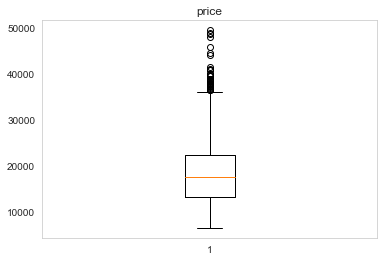

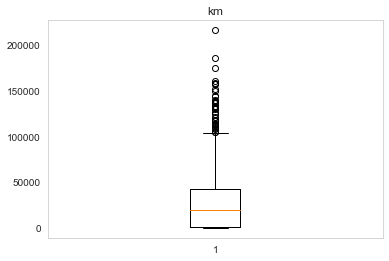

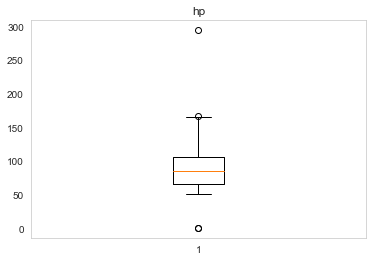

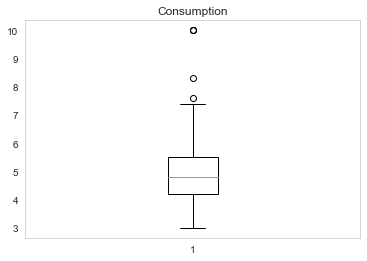

In [104]:
for i in ["price","km","hp","Consumption"]:
    plt.figure()
    plt.boxplot(df[i])
    plt.title(i)

<AxesSubplot:xlabel='hp'>

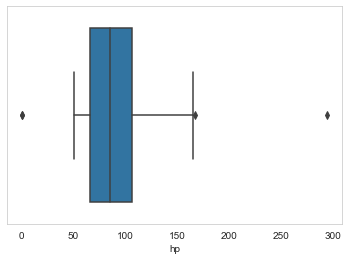

In [105]:
sns.boxplot(df["hp"])

In [106]:
df["hp"].sort_values()

527      1
73       1
0       51
265     51
173     51
      ... 
176    165
430    165
635    165
697    167
802    294
Name: hp, Length: 895, dtype: int64

### IQR Outliers

In [108]:
q1 = df["hp"].quantile(.25)
q1

66.5

In [109]:
q3 = df["hp"].quantile(.75)
q3

106.5

In [110]:
IQR = q3 - q1
IQR

40.0

In [111]:
ub = df["hp"].quantile(.75) + 1.5 * IQR
ub

166.5

In [112]:
lb = df["hp"].quantile(.25) - 1.5 * IQR
lb

6.5

In [113]:
df[df["hp"] > ub]

,model,body type,price,km,hp,Type,year,Body Color,Nr. of Doors,Nr. of Seats,Gearing Type,Cylinders,Drive chain,Fuel,Gears,Consumption,Upholstery
697,Renault Espace,Van,39990,10.0,167,Used,2019.0,Black,5,5,Automatic,4,front,Gasoline,6,4.7,Full leather
802,Audi A3,Sedans,45890,18700.0,294,Used,2018.0,White,5,5,Semi-automatic,5,front,Gasoline,7,8.3,Cloth


In [114]:
df[df["hp"] < lb]

,model,body type,price,km,hp,Type,year,Body Color,Nr. of Doors,Nr. of Seats,Gearing Type,Cylinders,Drive chain,Fuel,Gears,Consumption,Upholstery
73,Opel Astra,Station wagon,11600,73860.0,1,Used,2017.0,Black,5,5,Automatic,4,front,Gasoline,6,4.6,Cloth
527,Opel Astra,Station wagon,11900,70090.0,1,Used,2017.0,Black,5,5,Manual,4,front,Diesel,6,4.6,Cloth


In [115]:
df["hp"].shape[0] - df[df["hp"] < lb].shape[0] - df[df["hp"] > ub].shape[0]
# 895 - 2 - 2

891

In [116]:
df[~((df["hp"] > ub) | (df["hp"] < lb))]

,model,body type,price,km,hp,Type,year,Body Color,Nr. of Doors,Nr. of Seats,Gearing Type,Cylinders,Drive chain,Fuel,Gears,Consumption,Upholstery
0,Opel Corsa,Sedans,11390,10.0,51,Pre-registered,2019.0,Blue,5,5,Manual,4,front,Gasoline,5,5.6,Cloth
1,Opel Corsa,Sedans,10765,10.0,55,New,2019.0,Blue,5,5,Manual,4,front,Gasoline,5,5.4,Cloth
2,Opel Astra,Other,8740,36600.0,77,Used,2016.0,Grey,5,5,Manual,3,front,Gasoline,5,4.6,Cloth
3,Opel Astra,Sedans,14999,22800.0,77,Used,2018.0,Brown,5,5,Manual,4,front,Gasoline,6,4.5,Cloth
4,Opel Astra,Station wagon,23200,750.0,110,Demonstration,2019.0,Black,5,5,Automatic,4,front,Gasoline,6,4.0,Cloth
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
890,Opel Insignia,Station wagon,17990,133100.0,125,Used,2016.0,Silver,5,5,Automatic,4,front,Diesel,6,5.7,Full leather
891,Audi A3,Sedans,19500,60000.0,81,Used,2017.0,White,5,5,Automatic,4,front,Diesel,6,4.7,Cloth
892,Audi A3,Sedans,12999,186000.0,110,Used,2016.0,White,5,5,Automatic,4,front,Diesel,6,4.4,Full leather
893,Audi A1,Sedans,16200,15577.0,70,Used,2018.0,Blue,5,5,Manual,3,front,Gasoline,5,4.3,Cloth


In [117]:
df[~((df["hp"] > ub) | (df["hp"] < lb))].shape

(891, 17)

In [118]:
df = df[~((df["hp"] > ub) | (df["hp"] < lb))]

In [119]:
df

,model,body type,price,km,hp,Type,year,Body Color,Nr. of Doors,Nr. of Seats,Gearing Type,Cylinders,Drive chain,Fuel,Gears,Consumption,Upholstery
0,Opel Corsa,Sedans,11390,10.0,51,Pre-registered,2019.0,Blue,5,5,Manual,4,front,Gasoline,5,5.6,Cloth
1,Opel Corsa,Sedans,10765,10.0,55,New,2019.0,Blue,5,5,Manual,4,front,Gasoline,5,5.4,Cloth
2,Opel Astra,Other,8740,36600.0,77,Used,2016.0,Grey,5,5,Manual,3,front,Gasoline,5,4.6,Cloth
3,Opel Astra,Sedans,14999,22800.0,77,Used,2018.0,Brown,5,5,Manual,4,front,Gasoline,6,4.5,Cloth
4,Opel Astra,Station wagon,23200,750.0,110,Demonstration,2019.0,Black,5,5,Automatic,4,front,Gasoline,6,4.0,Cloth
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
890,Opel Insignia,Station wagon,17990,133100.0,125,Used,2016.0,Silver,5,5,Automatic,4,front,Diesel,6,5.7,Full leather
891,Audi A3,Sedans,19500,60000.0,81,Used,2017.0,White,5,5,Automatic,4,front,Diesel,6,4.7,Cloth
892,Audi A3,Sedans,12999,186000.0,110,Used,2016.0,White,5,5,Automatic,4,front,Diesel,6,4.4,Full leather
893,Audi A1,Sedans,16200,15577.0,70,Used,2018.0,Blue,5,5,Manual,3,front,Gasoline,5,4.3,Cloth


In [120]:
df.loc[73]

KeyError: 73

In [121]:
df = df.reset_index(drop=True)

In [122]:
df["hp"].sort_values()

0       51
264     51
172     51
684     51
788     51
      ... 
175    165
429    165
442    165
633    165
445    165
Name: hp, Length: 891, dtype: int64

In [123]:
df

,model,body type,price,km,hp,Type,year,Body Color,Nr. of Doors,Nr. of Seats,Gearing Type,Cylinders,Drive chain,Fuel,Gears,Consumption,Upholstery
0,Opel Corsa,Sedans,11390,10.0,51,Pre-registered,2019.0,Blue,5,5,Manual,4,front,Gasoline,5,5.6,Cloth
1,Opel Corsa,Sedans,10765,10.0,55,New,2019.0,Blue,5,5,Manual,4,front,Gasoline,5,5.4,Cloth
2,Opel Astra,Other,8740,36600.0,77,Used,2016.0,Grey,5,5,Manual,3,front,Gasoline,5,4.6,Cloth
3,Opel Astra,Sedans,14999,22800.0,77,Used,2018.0,Brown,5,5,Manual,4,front,Gasoline,6,4.5,Cloth
4,Opel Astra,Station wagon,23200,750.0,110,Demonstration,2019.0,Black,5,5,Automatic,4,front,Gasoline,6,4.0,Cloth
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,Opel Insignia,Station wagon,17990,133100.0,125,Used,2016.0,Silver,5,5,Automatic,4,front,Diesel,6,5.7,Full leather
887,Audi A3,Sedans,19500,60000.0,81,Used,2017.0,White,5,5,Automatic,4,front,Diesel,6,4.7,Cloth
888,Audi A3,Sedans,12999,186000.0,110,Used,2016.0,White,5,5,Automatic,4,front,Diesel,6,4.4,Full leather
889,Audi A1,Sedans,16200,15577.0,70,Used,2018.0,Blue,5,5,Manual,3,front,Gasoline,5,4.3,Cloth


In [125]:
df.loc[73]

model           Renault Espace
body type                  Van
price                    27888
km                    112237.0
hp                         118
Type                      Used
year                    2017.0
Body Color                Grey
Nr. of Doors                 5
Nr. of Seats                 7
Gearing Type         Automatic
Cylinders                    4
Drive chain              front
Fuel                    Diesel
Gears                        6
Consumption                4.6
Upholstery               Cloth
Name: 73, dtype: object

### Visualization

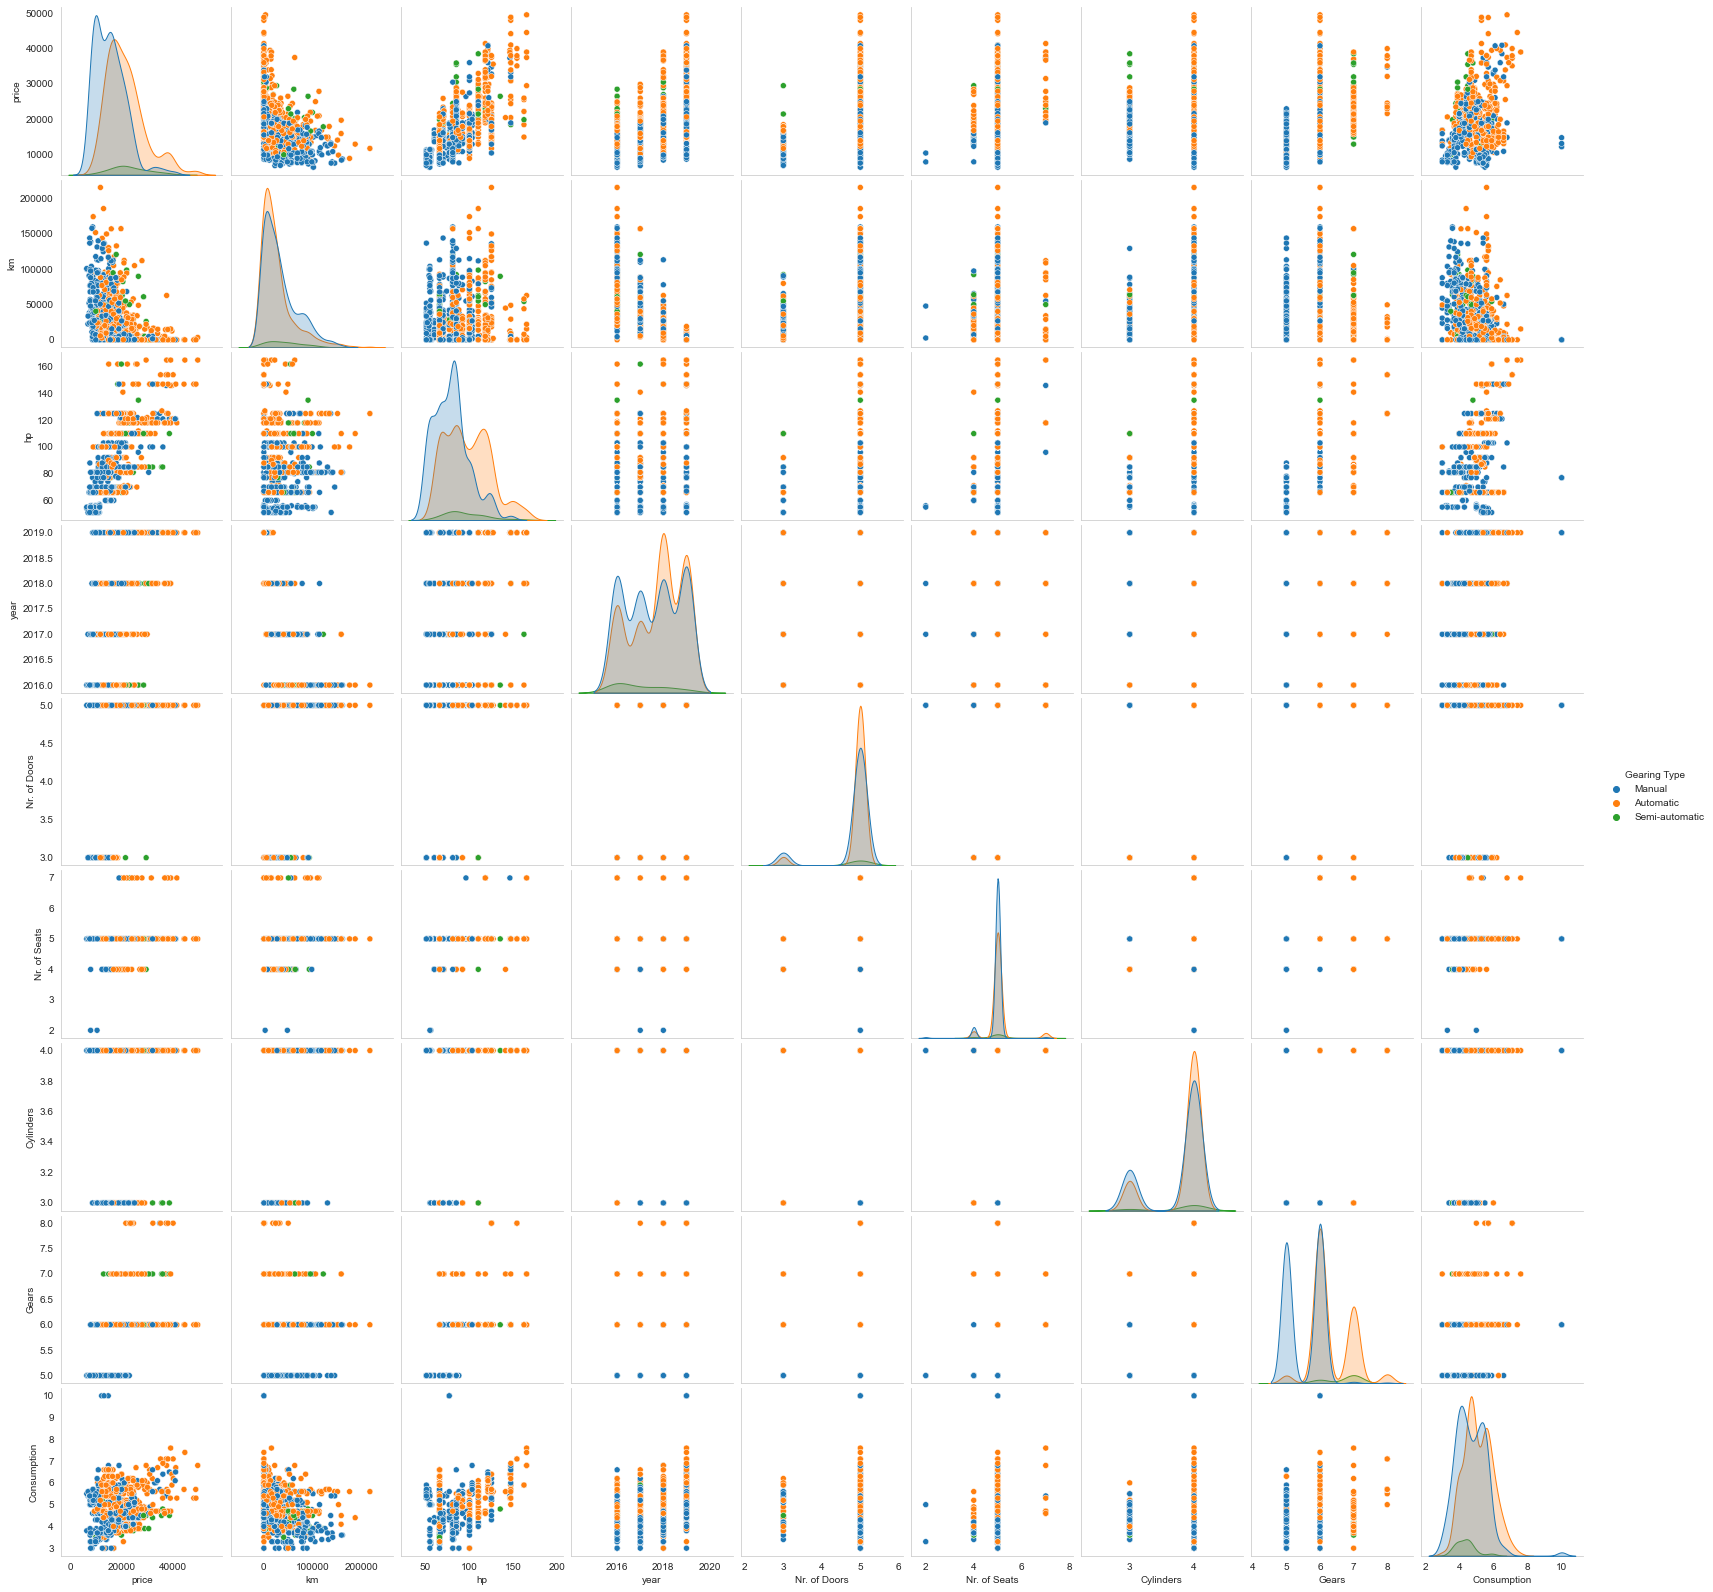

In [141]:
sns.pairplot(df, hue="Gearing Type")

<AxesSubplot:xlabel='model', ylabel='count'>

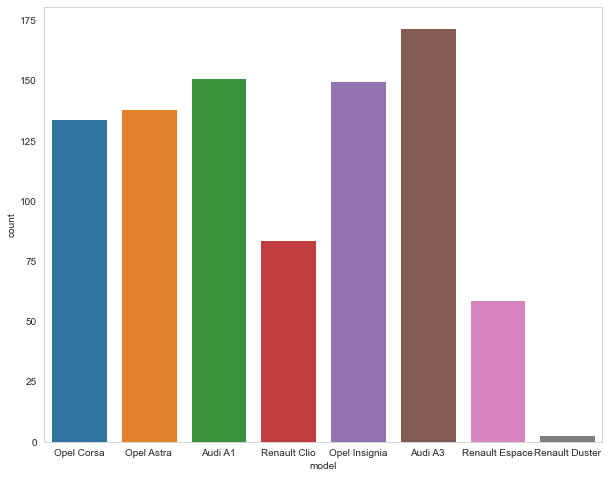

In [126]:
plt.figure(figsize=(10,8))
sns.countplot(df["model"])

<AxesSubplot:xlabel='model', ylabel='price'>

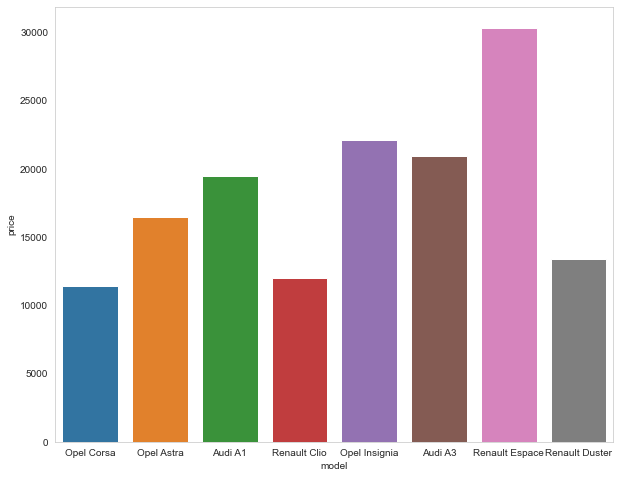

In [137]:
plt.figure(figsize=(10,8))
sns.barplot(x=df["model"], y=df["price"],ci=None)

Text(0.5, 1.0, 'Frekans & Consumption')

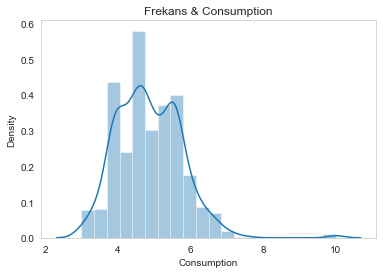

In [138]:
sns.distplot(df["Consumption"], bins=20, kde= True) 
plt.title("Frekans & Consumption")

Text(0.5, 0, 'Consumption')

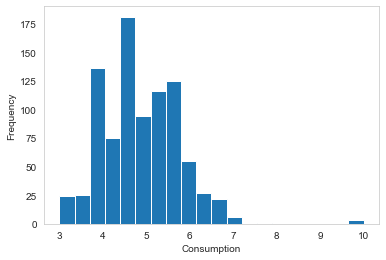

In [144]:
df["Consumption"].plot(kind="hist",bins=20)
plt.xlabel("Consumption")

<AxesSubplot:>

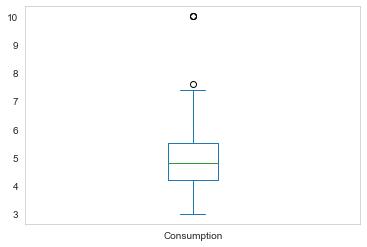

In [145]:
df["Consumption"].plot(kind="box")

<AxesSubplot:xlabel='price'>

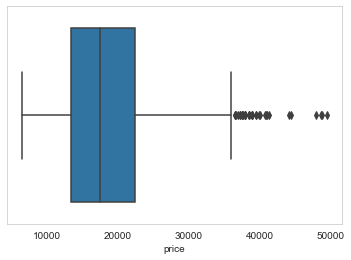

In [146]:
sns.boxplot(df["price"])

<AxesSubplot:xlabel='model', ylabel='km'>

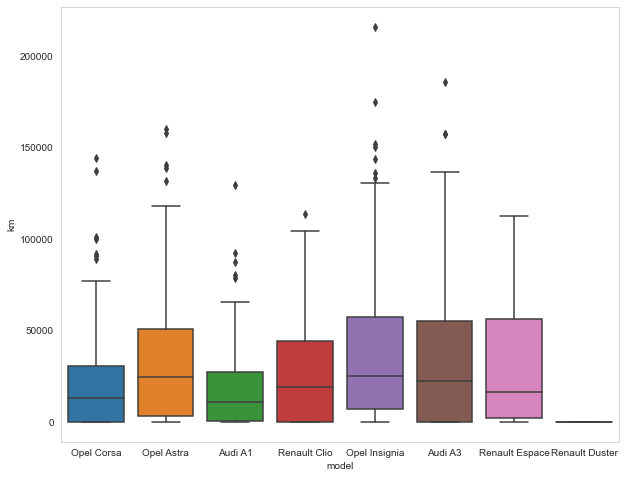

In [151]:
plt.figure(figsize=(10,8))
sns.boxplot(x="model", y="km", data=df)

<AxesSubplot:xlabel='year', ylabel='price'>

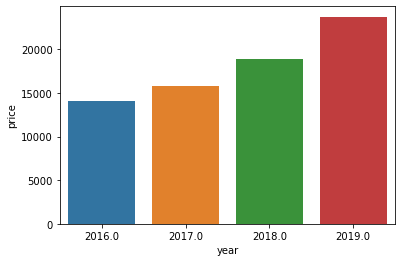

In [112]:
sns.barplot(x="year", y="price", data=df, ci=None)

<AxesSubplot:xlabel='price', ylabel='Gearing Type'>

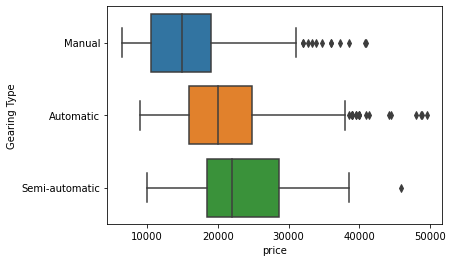

In [99]:
sns.boxplot(x="price", y="Gearing Type", data=df)

Text(0, 0.5, 'price')

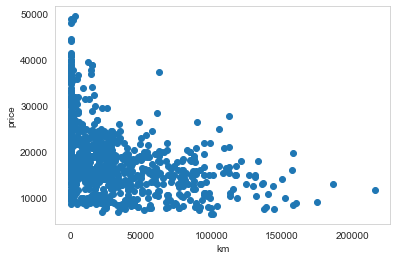

In [154]:
plt.scatter(df["km"], df["price"])
plt.xlabel("km")
plt.ylabel("price")

<AxesSubplot:xlabel='km', ylabel='price'>

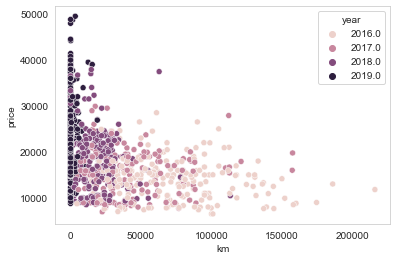

In [155]:
sns.scatterplot(x="km", y="price", hue="year", data=df, )


<AxesSubplot:xlabel='price', ylabel='Consumption'>

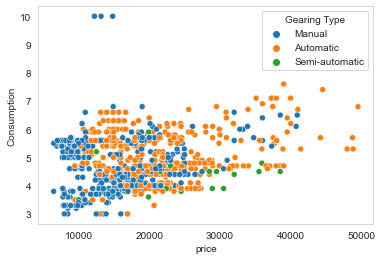

In [156]:
sns.scatterplot(x=df["price"], y=df["Consumption"], hue="Gearing Type", data=df)

In [33]:
df.columns

Index(['model', 'body type', 'price', 'km', 'hp', 'Type', 'year', 'Body Color',
       'Nr. of Doors', 'Nr. of Seats', 'Gearing Type', 'Cylinders',
       'Drive chain', 'Fuel', 'Gears', 'Consumption', 'Upholstery'],
      dtype='object')

<AxesSubplot:xlabel='price', ylabel='hp'>

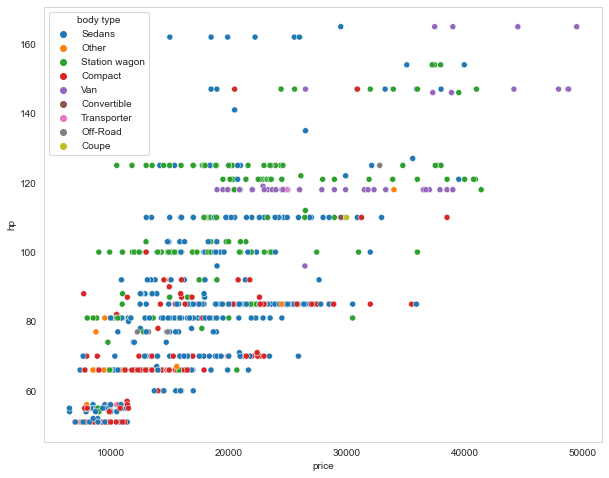

In [158]:
plt.figure(figsize=(10,8))
sns.scatterplot(x="price", y="hp", hue="body type", data=df)

<AxesSubplot:>

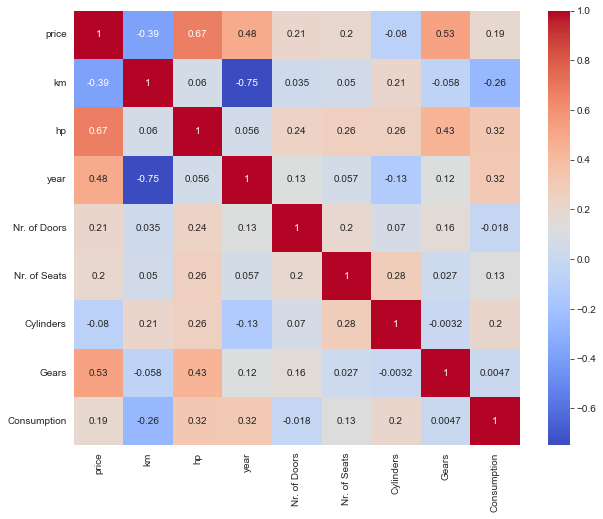

In [159]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")

<AxesSubplot:xlabel='Type', ylabel='price'>

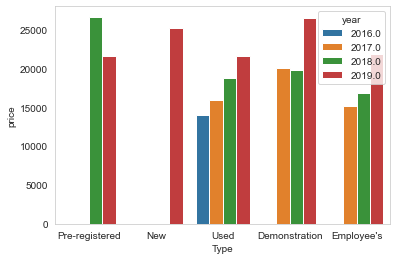

In [160]:
sns.barplot(x=df["Type"], y=df["price"], hue=df["year"], ci=None)

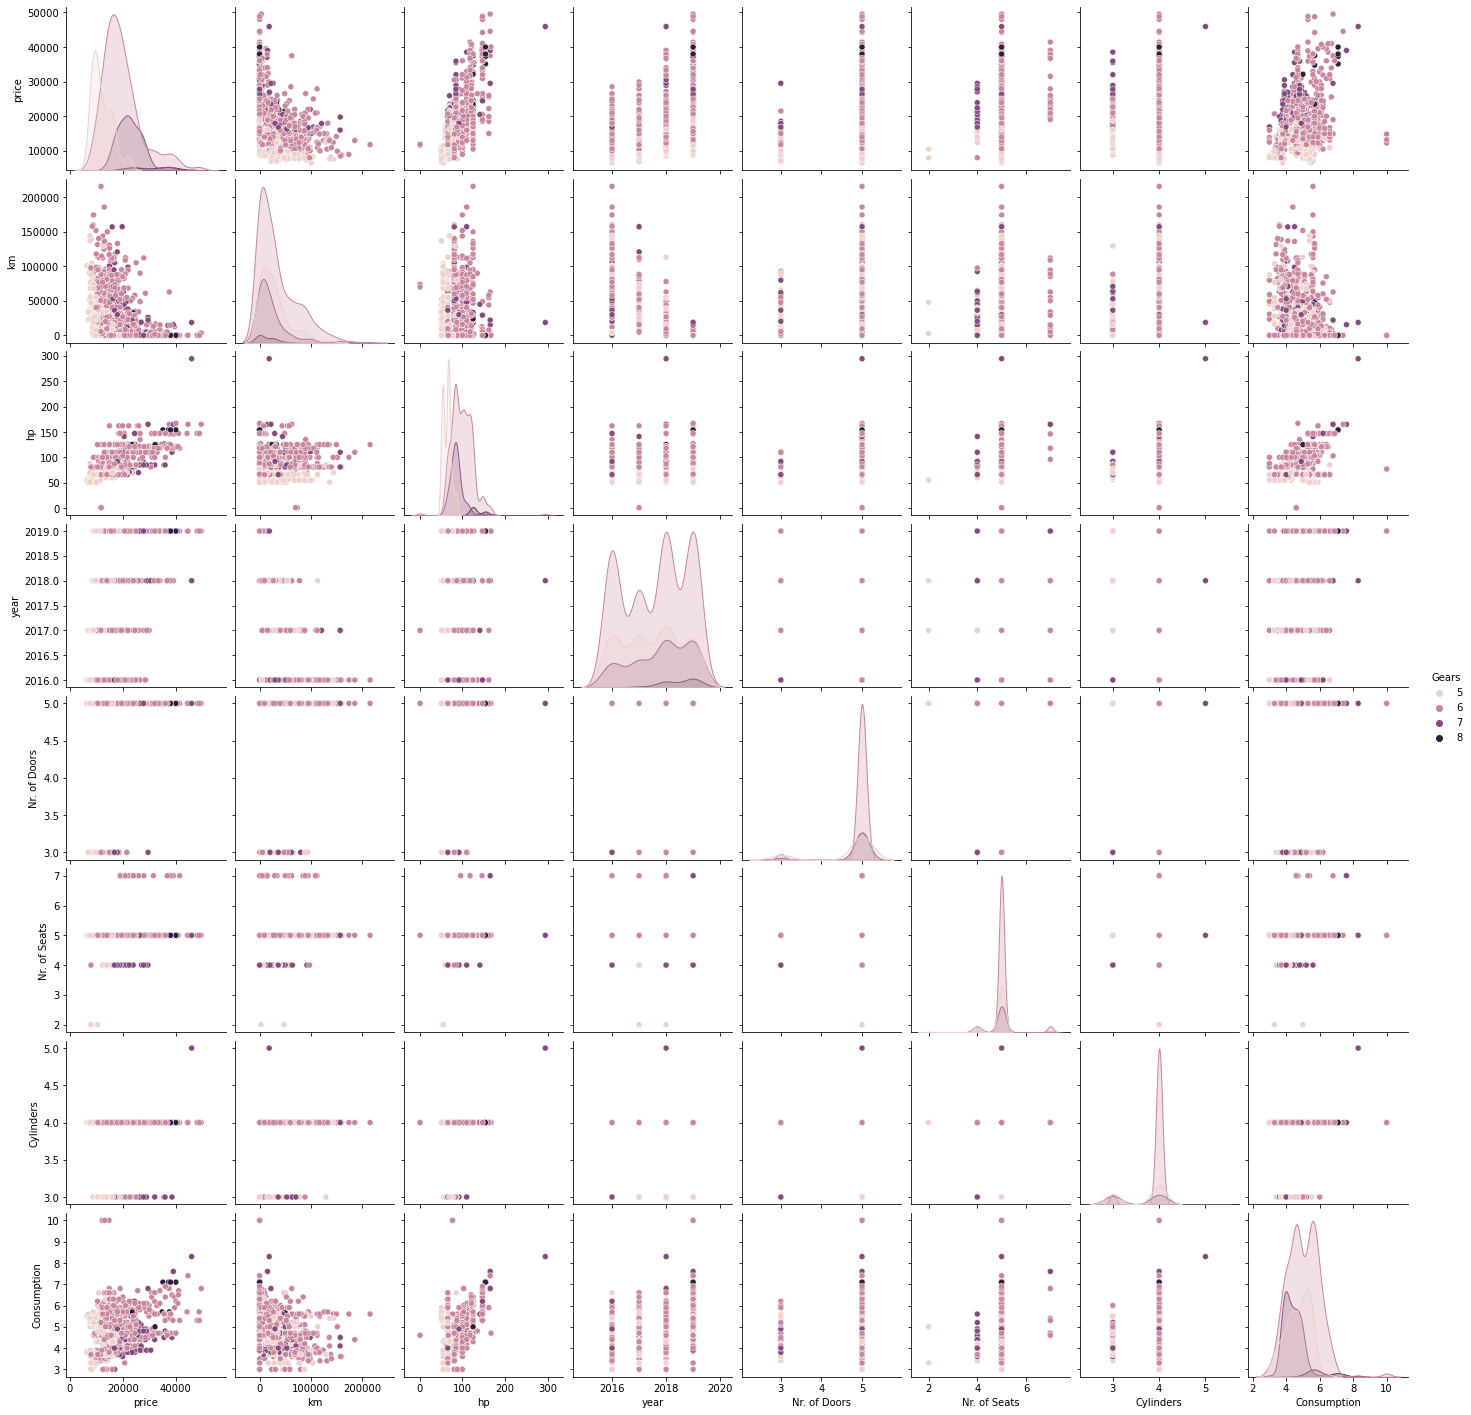

In [162]:
sns.pairplot(df, hue="Gears")

In [47]:
l = df.columns.values
l

array(['model', 'body type', 'price', 'km', 'hp', 'Type', 'year',
       'Body Color', 'Nr. of Doors', 'Nr. of Seats', 'Gearing Type',
       'Cylinders', 'Drive chain', 'Fuel', 'Gears', 'Consumption',
       'Upholstery'], dtype=object)

In [2]:
#!pip install dataprep
from dataprep.eda import create_report
create_report(df)

In [20]:
#df.loc[101, "km"] = np.nan
#df.loc[702, "km"] = np.nan
#df.loc[208, "Body Color"] = np.nan
#df.loc[505, "Body Color"] = np.nan
#df.loc[302, "Body Color"] = np.nan
#df.loc[199, "year"] = np.nan
#df.loc[721, "year"] = np.nan
#df.loc[602, "year"] = np.nan
#df.loc[25, "year"] = np.nan
#df.loc[66, "Consumption"] = np.nan
#df.loc[488, "Consumption"] = np.nan
#df.loc[528, "Consumption"] = np.nan
#df.loc[215, "Consumption"] = np.nan
#df.loc[53, "Consumption"] = np.nan